In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import numpy as np
import math
from scipy.optimize import curve_fit

mpl.rc('xtick', labelsize=15) 
mpl.rc('ytick', labelsize=15) 

%matplotlib inline

In [54]:
df1=pd.read_csv('Sample1.csv',header=None,names=['Wavelength','Intensity'])

#csv 데이터를 배열로 바꿔줌.
wl1=np.array(df1['Wavelength'])
It1=np.array(df1['Intensity'])

In [77]:
#초기값 파라미터들

pi=math.pi
sigma=0.78
I_max=1400
w_mid=np.median(wl1)
w_wid=40

w_wid

40

In [78]:
def Lorentzian(x,bl, amp1, cen1, wid1):
    return (bl+(amp1/pi)*(wid1/((x-cen1)**2+wid1**2)))

p0=[24,I_max,w_mid,w_wid]

parameters, covariance = curve_fit(Lorentzian,wl1,It1,p0=p0)

In [79]:
df=pd.DataFrame(parameters)
print(df)

              0
0    -24.945326
1 -27826.111999
2    521.891956
3     -6.794102


In [92]:
fit_A=parameters[0]
fit_B=-parameters[1]
fit_C=parameters[2]
fit_D=-parameters[3]
fit_y=Lorentzian(wl1,fit_A,fit_B,fit_C,fit_D)

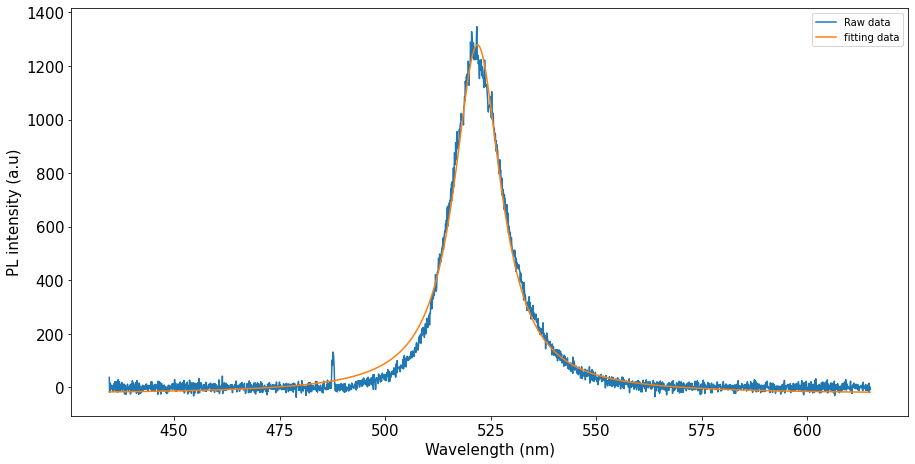

In [93]:
#df1.plot(kind='line',x='Wavelength',y='Intensity')

plt.plot(wl1,It1,label="Raw data") # 배열로 만들어진 csv데이터를 plotting 함.
plt.plot(wl1,fit_y,'-',label="fitting data")
plt.ylabel('PL intensity (a.u)',fontsize=15)
plt.xlabel('Wavelength (nm)',fontsize=15)
plt.legend()

fig = plt.gcf()
fig.set_size_inches(15, 7.5)

plt.show()